In [1]:
import random
from scipy import stats
import scipy
from numpy.linalg import inv
import numpy as np
import pandas as pd
from scipy.stats import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Q1 Simulation

In [8]:
def Overall(lamda,n):
    #question 1.1
    def xyvecs(lamda, n):  
        x =  uniform.rvs(loc=-2,scale=4,size=n)
        eps = np.random.normal(0,0.3,n)
        y=np.sin(lamda*x)+(0.3*(x**2))+(((x-0.5)/3)**3)+eps
        return(x,y)
        
    def xyvecsReal(lamda, n):  
        xo =  uniform.rvs(loc=-2,scale=4,size=n)
        yo=np.sin(lamda*xo)+(0.3*(xo**2))+(((xo-0.5)/3)**3)
        return(xo,yo)
    
    #####sample data
    x,y =xyvecs(lamda,n)
    xo,yo =xyvecsReal(lamda,n)
    newx,newy = xyvecs(lamda,n)
    ######
    
    #question 1.2  
    def gaussKernel(x,xo,h):
        fx=(1/(h * np.sqrt(2 * np.pi))*np.exp(-(x - xo)**2 / (2 * h**2))) 
        return fx 
    
    def regKernel(x,y,xo,h):
        gaussKernalSum = []
        predictY = []
        for i in range(len(x)):
            gaussKernalSum.append(gaussKernel(x[i],xo,h))
        for i in range(len(x)):
            predictY.append((y[i]*gaussKernel(x[i],xo,h)))
        predictYy=sum(predictY)/sum(gaussKernalSum) 
        return (predictYy)
    
    #question 1.3.a 
    def err(x,y,h):
        error=[]
        for i in range(len(xo)):
            error.append(((y[i]-regKernel(x,y,x[i],h))**2))
        emerr=(sum(error))/len(xo)
        return(emerr)
    
    #question 1.3.b 
    def trace_W_Ker(x,y,xo,h):
        trace = []
        scale = np.sqrt(1/(2*np.pi))
        for i in range(len(x)):
            expo = np.exp(-((x[i] - x)**2) / (2 * (h**2)))
            denominator = sum(scale*expo)
            ii = scale*np.exp(-((x[i] - x[i])**2) / (2 * (h**2)))
            trace.append(ii/denominator)
        Eop=(2*0.3*sum(trace))/(len(x))
        return(Eop)
    
    #question 1.3.c 
    def ErrIn(x,y,h):
        yo=np.sin(lamda*x)+(0.3*(x**2))+(((x-0.5)/3)**3)
        error=((yo-regKernel(x,y,x,h))**2)
        errorIn=sum(error)/len(y)
        return(errorIn)
    
    #question 1.3.d 
    def crossvalid2(x,y,h): 
        kf = KFold(n_splits=5)
        kf.get_n_splits(x)
        KFold(n_splits=5, random_state=None, shuffle=False)
        yPred = []
        mse = []
        for train_index, test_index in kf.split(x):
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            yPred=regKernel(x_train,y_train,x_test,h)
            mse.append(sum((yPred-y_test)**2)/(len(yPred)))
        return(sum(mse)/5)
        
    #question 1.3.e 
    
    def ErrOut(x,y,h,lamda):
        errorOut=((newy-regKernel(x,y,newx,h))**2)
        errorOut=sum(errorOut)/len(y)
        return(errorOut)
    
    #Quadratic 
    def errPolty(x,y):
        constant=np.ones(len(x))
        xfit = np.array([constant,x,x**2]).T
        beta = np.linalg.inv(xfit.T @ xfit) @ xfit.T @ y 
        ypred=xfit @ beta
        error= ((y-ypred)**2)
        emerr=(sum(error))/len(x)
        return(emerr)

    def Eoppoly(x,y):
        constant=np.ones(len(x))
        xfit = np.array([constant,x,x**2]).T
        Px = xfit @ np.linalg.inv(xfit.T @ xfit) @ xfit.T    
        trace = sum(Px)
        Eop=(((2*0.3)/len(x))*trace)[0]
        return(Eop)
    
    def ErrInpoly(x,y):
      yo=np.sin(lamda*x)+(0.3*(x**2))+(((x-0.5)/3)**3)
      constant=np.ones(len(x))
      xfit = np.array([constant,x,x**2]).T
      beta = np.linalg.inv(xfit.T @ xfit) @ xfit.T @ y 
      ypred= xfit @ beta
      bias=sum((ypred-yo.T)**2)/(len(x))
      errin=bias
      return(errin)
      
    def crossvalidpoly(x,y): 
        kf = KFold(n_splits=5)
        kf.get_n_splits(x)
        KFold(n_splits=5, random_state=None, shuffle=False)
        ypred = []
        mse = []
        constant=np.ones(len(x))
        xfit = np.array([constant,x,x**2]).T
        for train_index, test_index in kf.split(xfit):
            x_train, x_test = xfit[train_index], xfit[test_index]
            y_train, y_test = y[train_index], y[test_index]
            beta = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train
            ypred= x_test @ beta
            mse.append(sum((ypred-y_test)**2)/(len(ypred)))
        return(sum(mse)/5)
    
    def ErrOutpoly(x,y):
        constant=np.ones(len(x))
        xfit = np.array([constant,x,x**2]).T
        beta = np.linalg.inv(xfit.T @ xfit) @ xfit.T @ y
        newxfit = np.array([constant,newx,newx**2]).T
        ypred=newxfit@beta
        errorOut=((newy-ypred)**2)
        errorOut=sum(errorOut)/len(y)
        return(errorOut)

    hValues=np.arange(0.02, 3,0.03)
    differr = []
    diffErrOut = []
    difftrace_W_Ker=[] 
    diffCrossvalid = []
    diffErrIn2= [] 
    for i in hValues:
        differr.append(err(x,y,i))
        diffCrossvalid.append(crossvalid2(x,y,i))
        diffErrOut.append(ErrOut(x,y,i,lamda))
        difftrace_W_Ker.append(trace_W_Ker(x,y,xo,i))
        diffErrIn2.append(ErrIn(x,y,i))
    plt.figure(0,dpi=250)
    plt.scatter(hValues,differr, color='r', label = 'err')
    plt.scatter(hValues,difftrace_W_Ker, color='y', label = 'Eop')
    plt.scatter(hValues,diffErrIn2, color='g', label = 'ErrIn')
    plt.scatter(hValues,diffCrossvalid, color='orange', label = 'CV')
    plt.scatter(hValues,diffErrOut, color='b', label = 'ErrOut')
    plt.axhline(errPolty(x,y),color='r')
    plt.axhline(Eoppoly(x,y),color='y')
    plt.axhline(ErrInpoly(x,y),color='g')
    plt.axhline(crossvalidpoly(x,y),color='orange')
    plt.axhline(ErrOutpoly(x,y),color='b')
    plt.xlabel('h')
    plt.ylabel('Error')
    plt.title("Lamda = {}, n = {}".format(lamda,n))    
    plt.grid()
    plt.ylim([0, 0.85])
    plt.axvline(color='black')
    plt.axhline(color='black')
    plt.tight_layout()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)

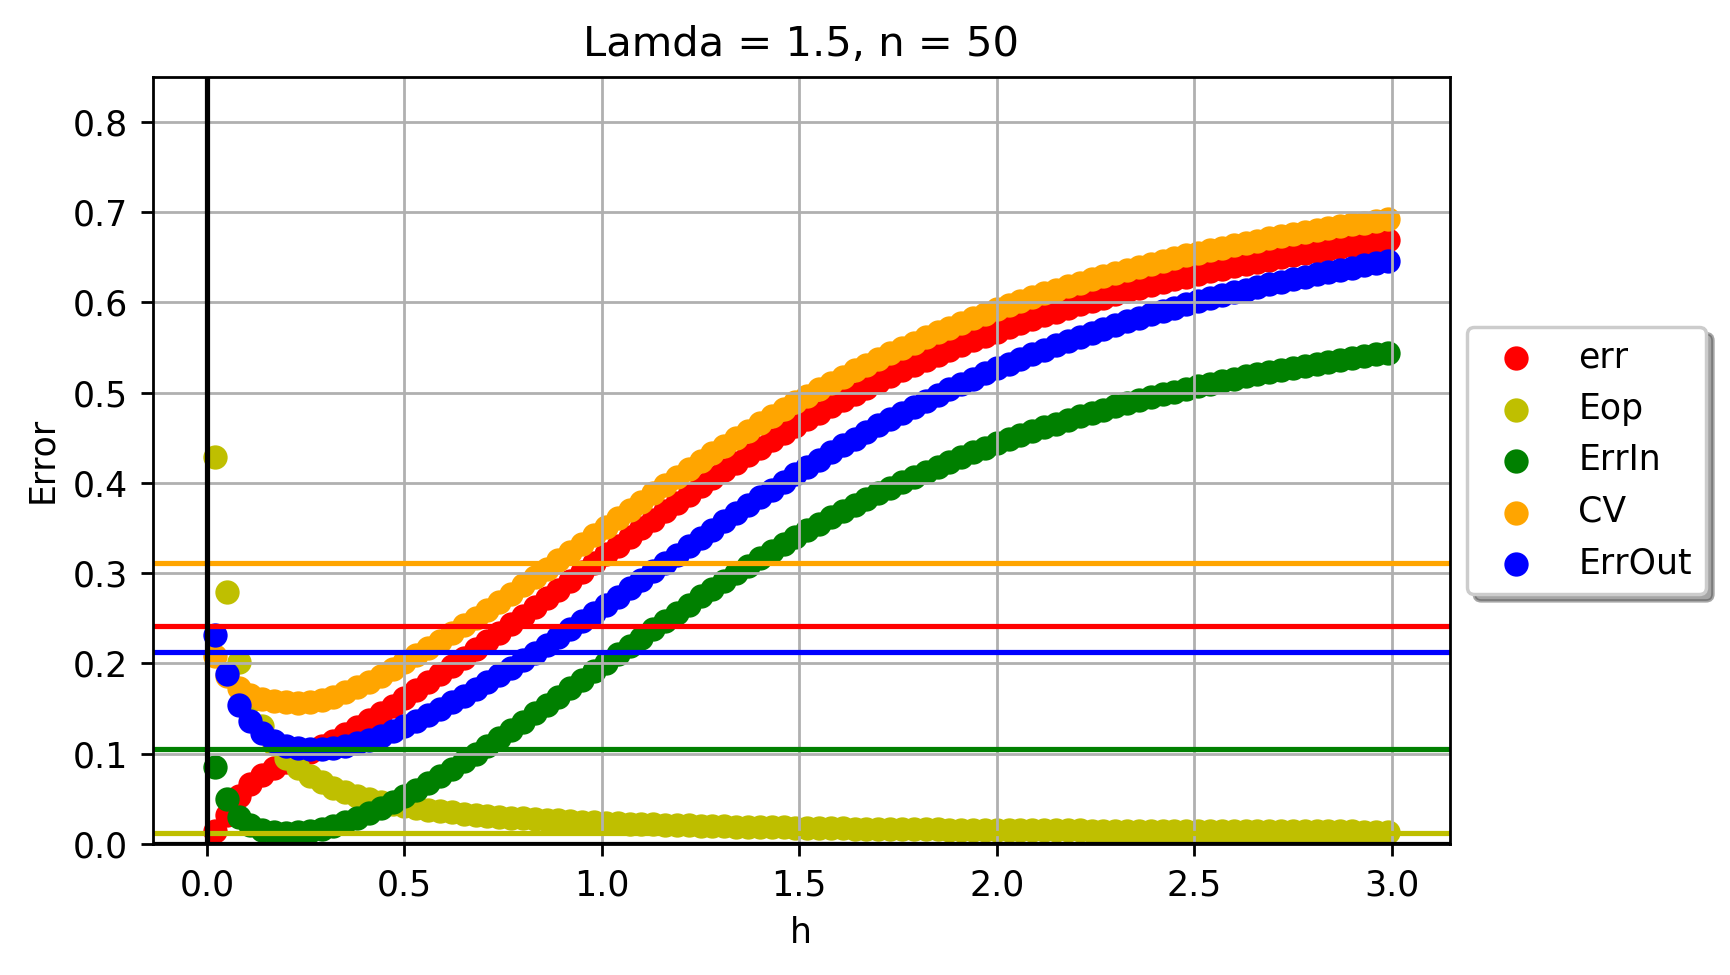

In [9]:
Overall(1.5,50) 

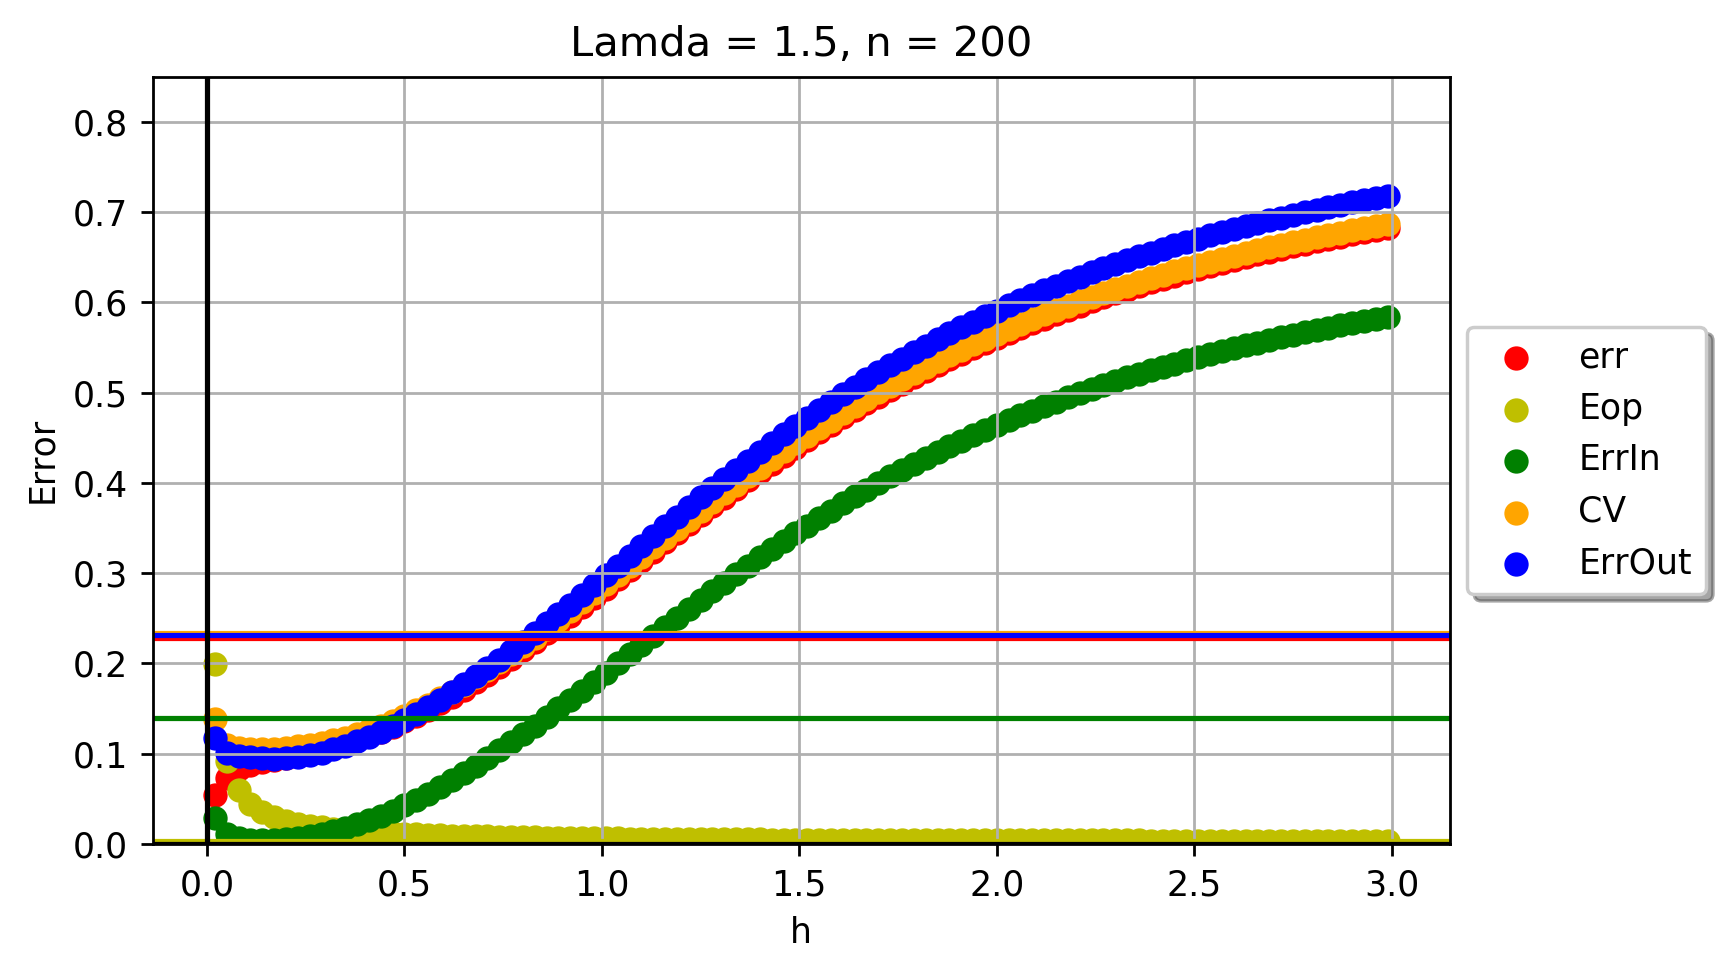

In [10]:
Overall(1.5,200) 

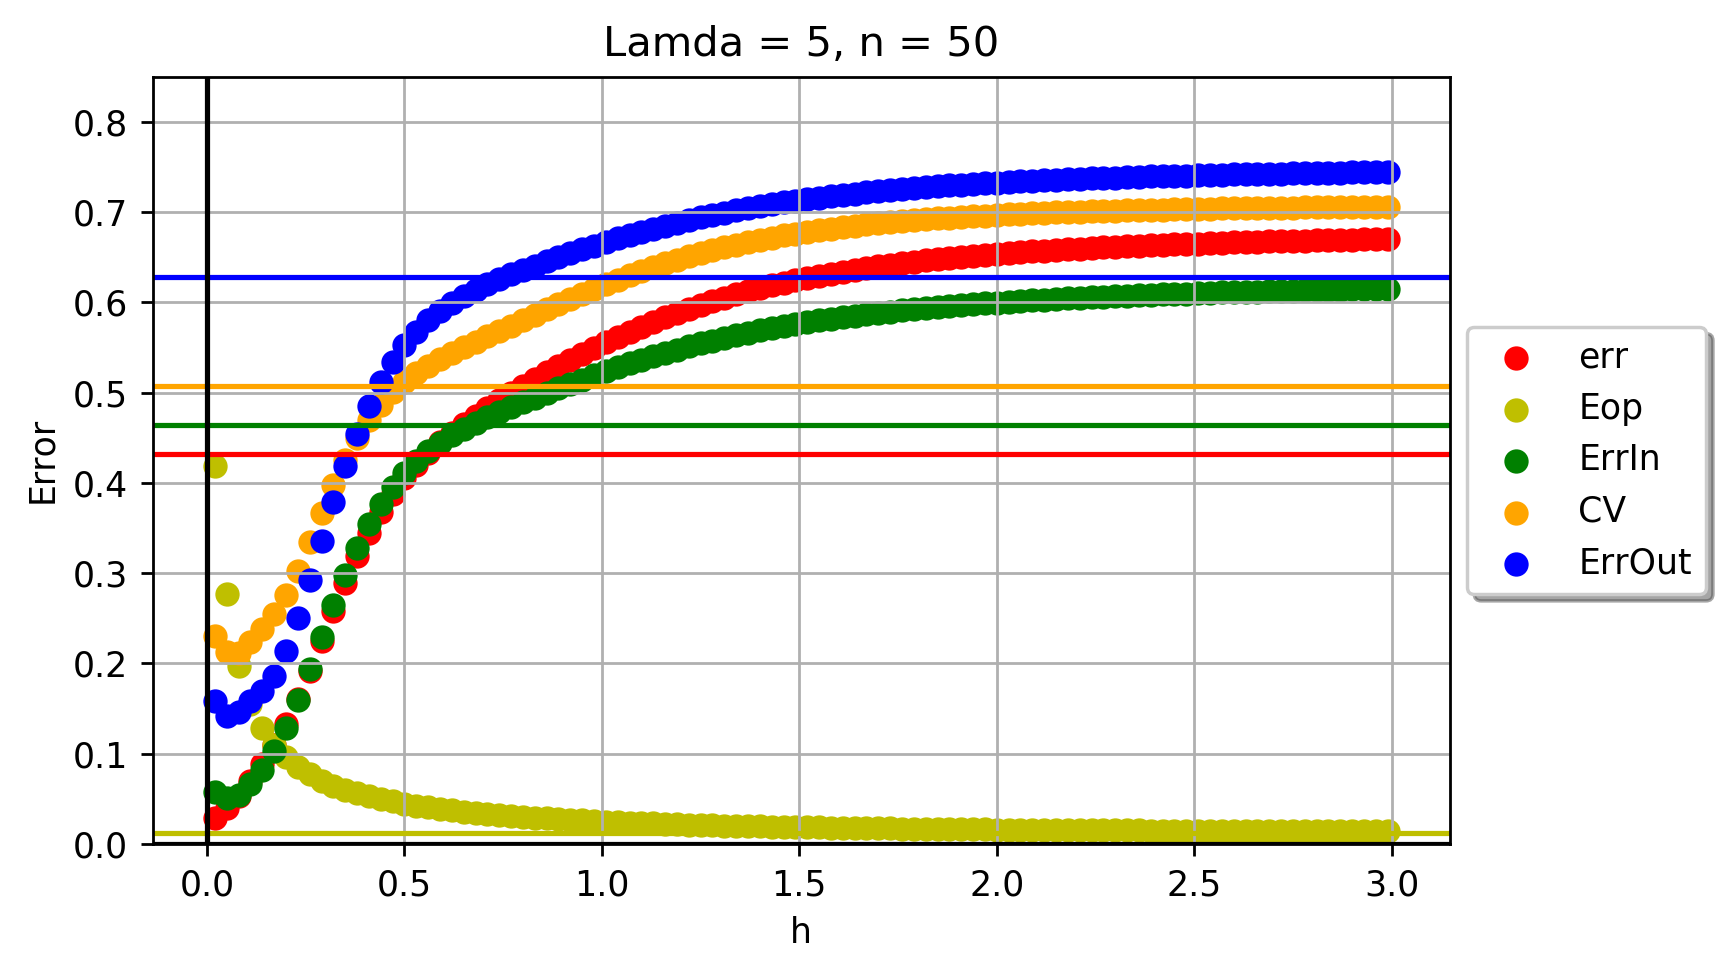

In [11]:
Overall(5,50) 

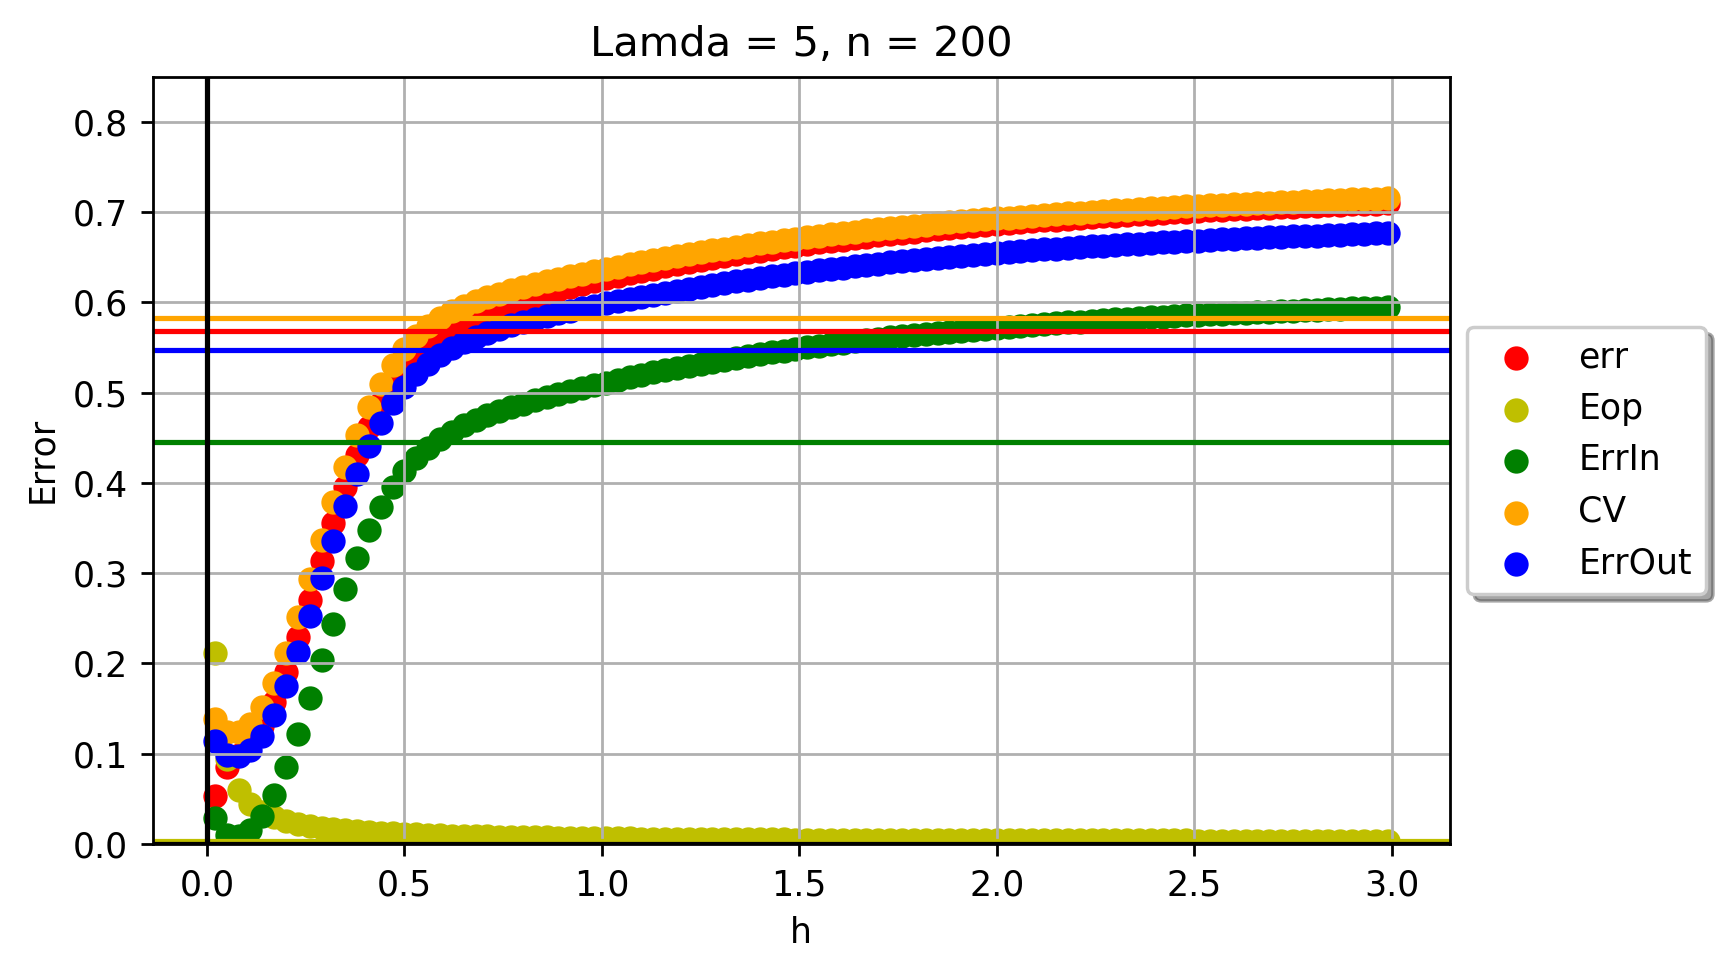

In [12]:
Overall(5,200) 

In this question, we sampled data from the "real" function together with some noise (we used 2 sample sizes and 2 different sinus parameters - fast and slow change rate of the function). For the kernel regression, we examined the errors for the range of h - 0 to 3 with jumps of 0.03 (in the Quadratic regression h constant). From the graphs, we can see that in kernel regression the error decrease when h values are small and then increases sharply until convergence as the h values increase. Because of overfitting, in the range of small h values, we have seen high levels of optimism. When h values high, the kernel becomes wide and covers a bigger part of our data points and thus less "sensitive". When h is big enough the kernel catches all our data points. We can see that the yellow curve representing optimism decreases as h increasing, which happens because of the decrease in the optimism which represents overfitting. It seems that we consistently get lower errors in Errin than with the other metrics in both types of regression. The other metrics behave relatively similar. When the lamda is small, all metrics show lower errors (except for the extreme h values). It's valid for both regressions. This happens because the sinus is changing faster in the larger lamda. It may be more difficult for the regression to follow trends that change faster than those that change slower. Because the kernel regression is more flexible than the quadratic regression, we can see that at the very low h values there are no differences in errors between the two lamda values, however as h increases the flexibility is lost and there is no advantage for the kernel regression. The most noticeable difference between the small sample and the larger one is the level of optimism. In the small sample, the optimism is higher, it makes sense, since the larger the sample, the closer we are to the "real" data. Another interesting thing that emerges from the simulation is that the kernel regression optimism decreases and converges to the quadratic regression constant optimism. The reason for the over-optimism of the kernel regression, as we have stated already - "over-flexibility". The kernel provides better predictions when the h values are lower but it pays with over-fitting, while in quadratic regression the predictions are less good but less overfitted. In the high h values (around h=1 and above), the quadratic regression provides more accurate predictions than the kernel.



# Q 2 

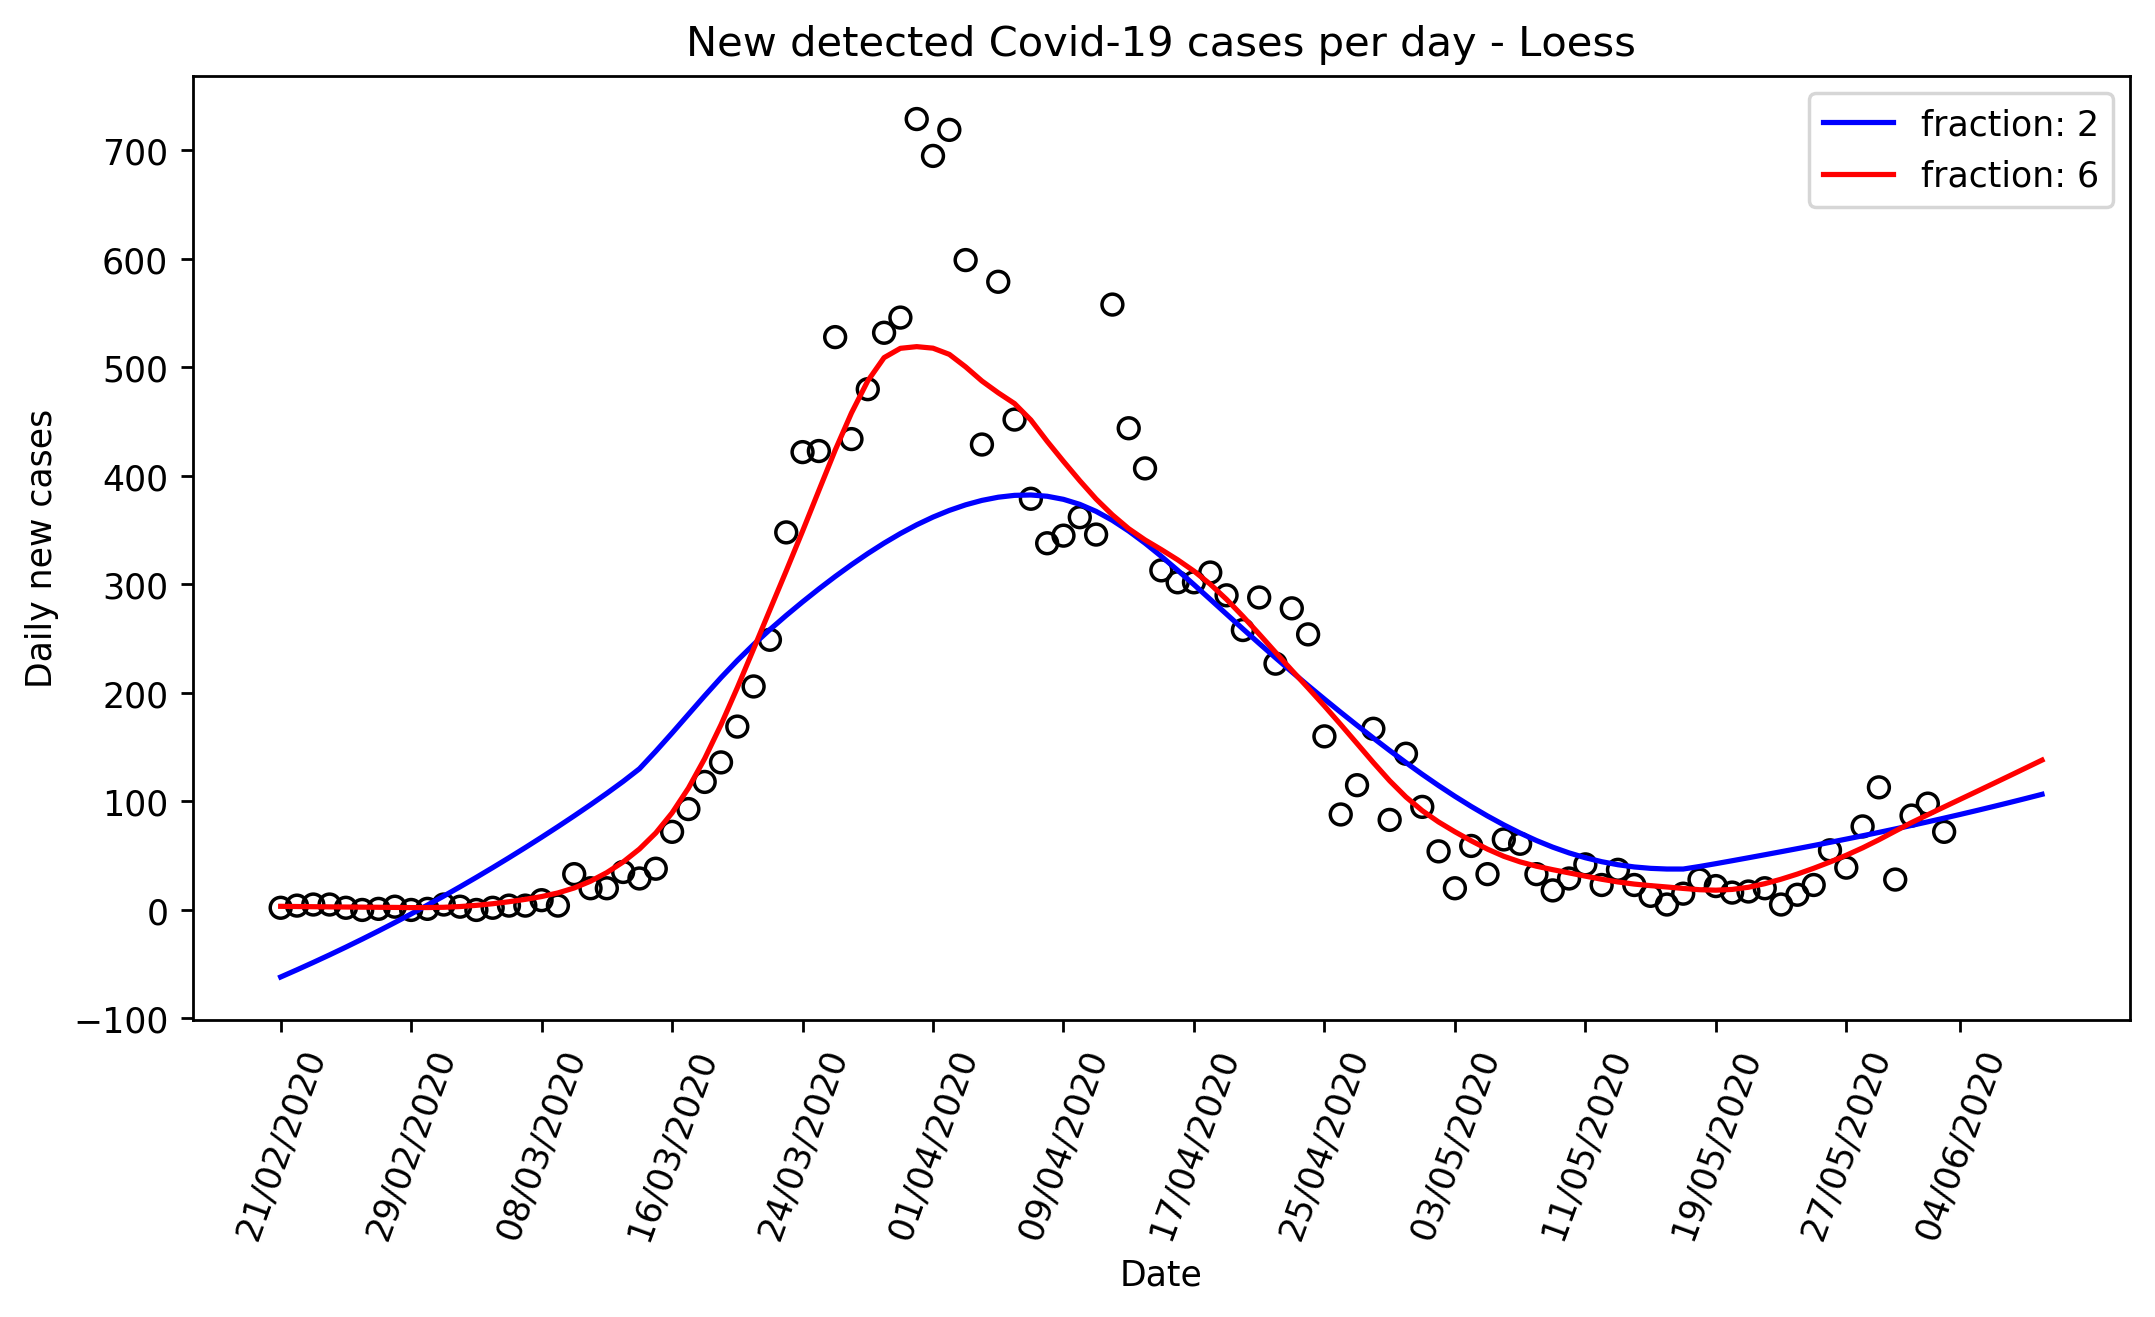

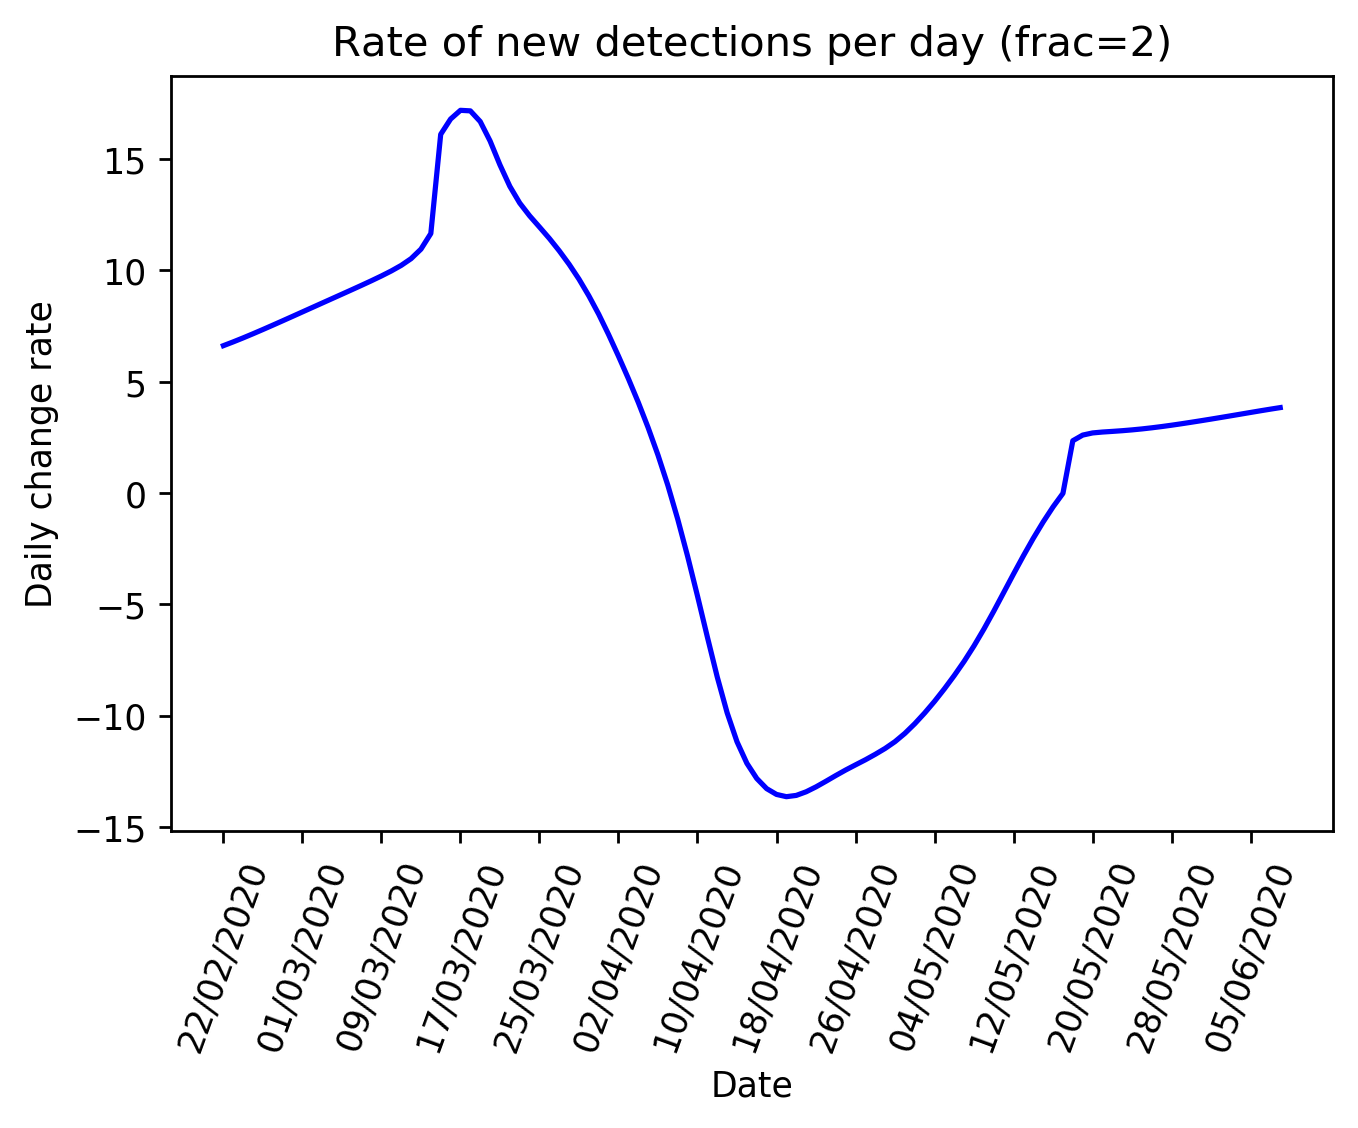

<Figure size 2500x1250 with 0 Axes>

In [13]:
url = 'https://raw.githubusercontent.com/idandrd/israel-covid19-data/master/IsraelCOVID19.csv'
df = pd.read_csv(url, error_bad_lines=False)
df=df[['Date','New Cases']]
df = df[df['New Cases'].notna()]
dic = {'103':['03/06/2020',92],'104':['04/06/2020',118],'105':['05/06/2020',120],'106':['06/06/2020',136]
       ,'107':['07/06/2020',111],'108':['08/06/2020',148]}
df2 = pd.DataFrame.from_dict(dic,orient='index')
df2.columns = ['Date','New Cases']
df=pd.concat([df, df2])
x = df.Date
y = df['New Cases']
lowess_sm = sm.nonparametric.lowess
yest_sm = lowess_sm(y,x.index,frac=1./109.,it=3, return_sorted = False)
yest_sm2 = lowess_sm(y,x.index,frac=1./2.35,it=1, return_sorted = False)
yest_sm3 = lowess_sm(y,x.index,frac=1./6.,it=1, return_sorted = False)
fig = plt.figure(dpi=250,figsize=(10,5))
plt.scatter(x[0:103], y[0:103],  edgecolor = 'black',facecolors = 'none',)
plt.xticks(x[::8], rotation=70)
plt.plot(x.index,yest_sm2,color = 'blue', label = 'fraction: 2')
plt.plot(x.index,yest_sm3,color = 'red', label = 'fraction: 6')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Daily new cases')
plt.title('New detected Covid-19 cases per day - Loess')
plt.show()
z=lowess_sm(yest_sm2 ,df.index)
p=np.diff(yest_sm2)/np.diff(z[0:109,0])

#fig2
fig = plt.figure(dpi=250)
plt.plot(z[1:109,0],p,color = 'blue')
plt.xlabel('Date')
plt.ylabel('Daily change rate')
plt.title('Rate of new detections per day (frac=2)')
plt.xticks(z[1::8,0], x[1::8] , rotation=70)
fig = plt.figure(dpi=250,figsize=(10,5))
